# Proposal and testing of the CBM SiPM-based RICH detector

### Module for testing Silicon Photo-Multipliers and Multi-Pixel Photon Counters. This python module allows users to performe noise analysis of SiPM/MPPCs: Dark Count Rate, Afterpulsing, and Crosstalk. Futhermore, the SiPM/MPPC module is capable to set SiPM arrays (MPPC) for large area detectors like Ring Imaging Cherenkov, Cherenkov Telescopes, etc. Users can simulate ring or trace shape signals based on the expected number of photons generated by the source. The estimation of the signal to noise ratios (SNR) is also available.

Author: Dr. Jesús Peña Rodríguez

Experiment: Compressed Baryonic Matter (CBM)

Bergische Universität Wuppertal

March, 2023

In [1]:
import SiPM_MPPC.sipm as sipm
import matplotlib.pylab as plt
import numpy as np

In [2]:
def Camera_noise(Pulse_shape, N_pixel, Pixel_size, DCR, Cross, After, W, R, sigma, Nr, Nc, t0, Window, Th ):

    Array_i = np.zeros((N_pixel,W))
    P = Nr*Nc # Number of MPPC (rows x columns)

    Noise_array = np.zeros((Nr*8,Nc*8))

    fig = plt.figure(figsize=(20, 20))

    C = 0
    F = 0

    # Triggering parameters

    Trigger = Th*np.max(Pulse_shape)

    A = Nc if Nc>Nr else Nr
    fig = plt.figure(figsize=(A,A))
    
    for j in range(P):
        Array_i, time = sipm.MPPC(Pulse_shape, N_pixel, DCR, Pixel_size, Cross, After, W, R, sigma)

        MPPC_i = np.zeros(N_pixel) 

        for i in range(N_pixel):
            if np.max(Array_i[i,t0:t0+Window]) >= Trigger:
                MPPC_i[i] = 1
        MPPC = np.reshape(MPPC_i, (M, M))
        Noise_array[F*8+0:F*8+8,C*8+0:C*8+8] = MPPC 
        C+=1
        if C==P/Nr:
            C=0
            F+=1

        plt.subplot(A,A,j+1)
        plt.imshow(MPPC, cmap='Blues')
        plt.xticks([])
        plt.yticks([])
        fig.tight_layout(pad=0.1)
        
    return Noise_array

In [3]:
def Ring_generator(Nc, Nr, r, Np_ring, N_rings):

    Ring_array = np.zeros((Nc*8,Nr*8))



    for j in range(N_rings):

        x0 = int(np.random.uniform(0, Nc*8))
        y0 = int(np.random.uniform(0, Nr*8))

        for i in range(Np_ring):

            theta = np.random.uniform(0, 2*np.pi)

            x = int(r*np.cos(theta))
            y = int(r*np.sin(theta))
            a = x + x0
            b = y + y0

            if a >= 0 and b >=0 and a < Nc*8 and b < Nr*8: # boundary conditions
                Ring_array[a,b]= Ring_array[a,b] + 1
                
    return Ring_array

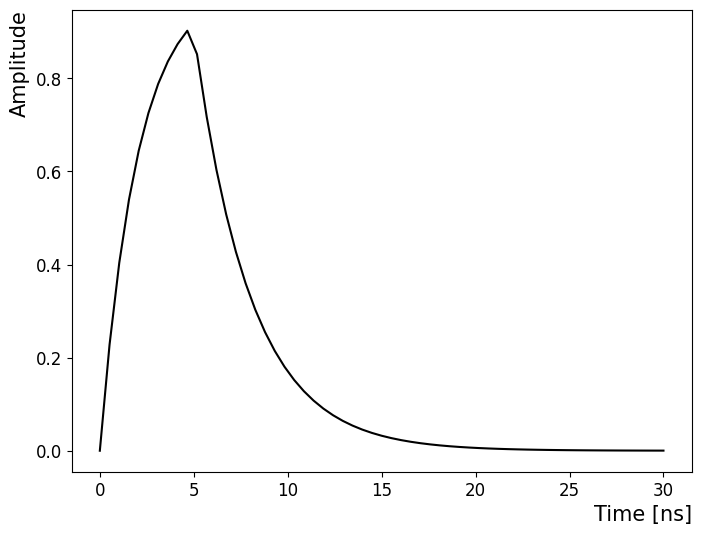

In [18]:
# Rt = 125e-9 # Rising time 5 
# Ft = 55e-9   # Falling time 50
# A = 1 # Pulse amplitude (spe) single photo-electron
# tm = 5e-9 # Maximum's peak time (s) 20
# R = 0.2 # Time resolution in ns 1

# Pulse shape

Rt = 2e-9 # Rising time 5 
Ft = 3e-9   # Falling time 50
A = 1 # Pulse amplitude (spe) single photo-electron
tm = 5e-9 # Maximum's peak time (s) 20
R = 0.5 # Time resolution in ns 1

# Rt = 0.2e-9 # Rising time 5 
# Ft = 1e-9   # Falling time 50
# A = 1 # Pulse amplitude (spe) single photo-electron
# tm = 1e-9 # Maximum's peak time (s) 20
# R = 0.5 # Time resolution in ns 1

# Pixel model

DCR = 159e3  # Hz/mm2
Pixel_size = 36.0 # mm2
Cross = 0.24 # %
After = 0.05 # %
sigma = 0.1 # Pulse amplitude variance
W = 100 # Recording window in ns

# MPPC model

M = 8 # M x M array szie
N_pixel = M*M

Pulse_shape = sipm.Pulse(Rt, Ft, A, tm, R, plot=True)
Channels, time = sipm.MPPC(Pulse_shape, N_pixel, DCR, Pixel_size, Cross, After, W, R, sigma)

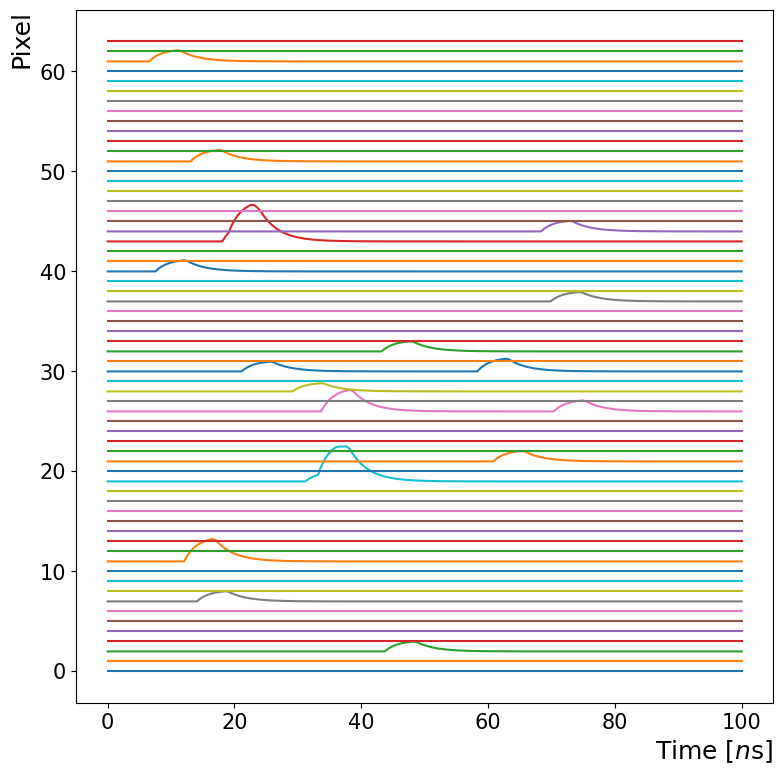

In [19]:
#%matplotlib inline

plt.figure(figsize=(9, 9))

for i in range(N_pixel):
    plt.plot(time, Channels[i,:]+i)
plt.xlabel("Time [$n$s]", horizontalalignment='right', x=1.0, fontsize=18)
plt.ylabel("Pixel", horizontalalignment='right', y=1.0, fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# plt.savefig("Figures/SiPM_Res.eps", bbox_inches='tight', dpi=300)

plt.show()

## RICH panel noise

<Figure size 2000x2000 with 0 Axes>

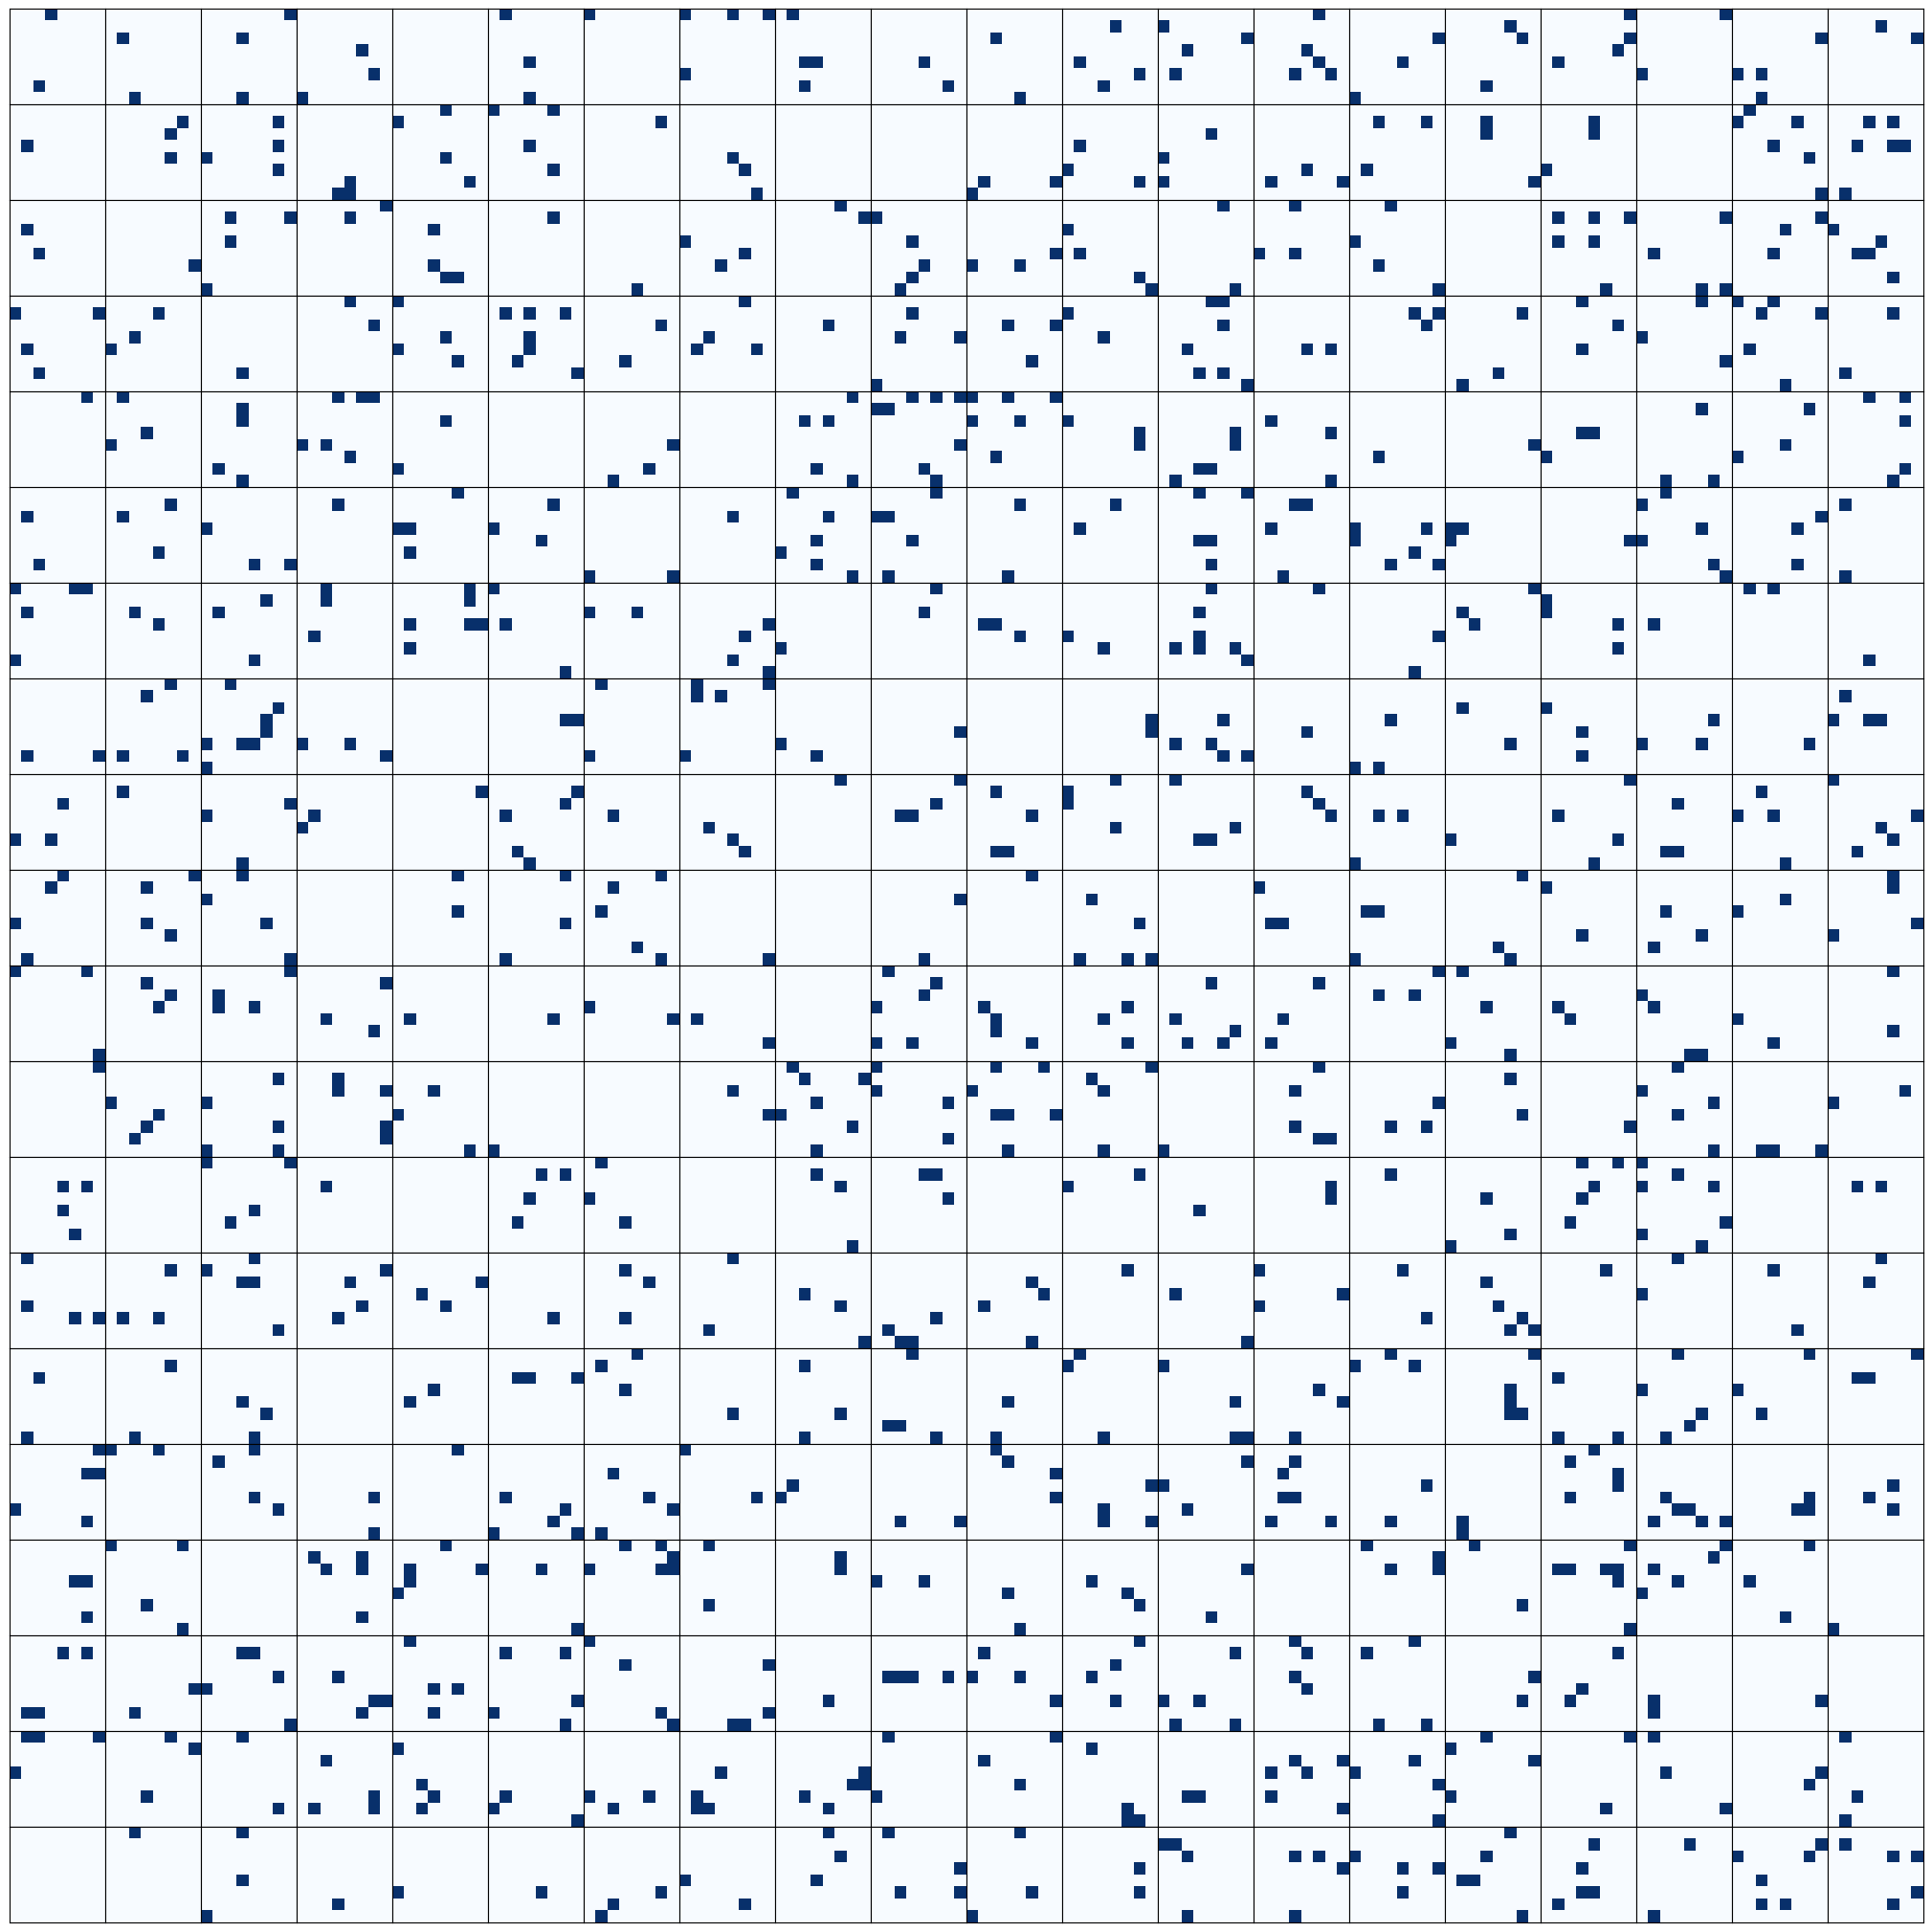

In [27]:
Array_i = np.zeros((N_pixel,W))
Nr = 20 #14
Nc = 20 #36
P = Nr*Nc # Number of MPPC

Noise_array = np.zeros((Nr*8,Nc*8))

fig = plt.figure(figsize=(20, 20))

C = 0
F = 0

# Triggering parameters

T0 = int(45/R)
Window = int(2/R)
Trigger = 0.5*np.max(Pulse_shape)

A = Nc if Nc>Nr else Nr

fig = plt.figure(figsize=(A,A))

for j in range(P):
    Array_i, time = sipm.MPPC(Pulse_shape, N_pixel, DCR, Pixel_size, Cross, After, W, R, sigma)
    
    MPPC_i = np.zeros(N_pixel) 

    for i in range(N_pixel):
        if np.max(Array_i[i,T0:T0+Window]) >= Trigger:
            MPPC_i[i] = 1
    MPPC = np.reshape(MPPC_i, (M, M))
    Noise_array[F*8+0:F*8+8,C*8+0:C*8+8] = MPPC 
    C+=1
    if C==P/Nr:
        C=0
        F+=1
        
    
    plt.subplot(A,A,j+1)
    plt.imshow(MPPC, cmap='Blues')
    plt.xticks([])
    plt.yticks([])
    fig.tight_layout(pad=0.01)
    

## Cherenkov ring simulation

In [28]:
Ring_array = np.zeros((Nc*8,Nr*8))

r  = 6.0 # Cherenkov ring diameter, we can add radious variance
Np_ring = 27 # Number of photons per ring
N_rings = 30 # Number of rings

for j in range(N_rings):
    
    x0 = int(np.random.uniform(0, Nc*8))
    y0 = int(np.random.uniform(0, Nr*8))

    for i in range(Np_ring):

        theta = np.random.uniform(0, 2*np.pi)

        x = int(r*np.cos(theta))
        y = int(r*np.sin(theta))
        a = x + x0
        b = y + y0

        if a >= 0 and b >=0 and a < Nc*8 and b < Nr*8: # boundary conditions
            Ring_array[a,b]= Ring_array[a,b] + 1

<Figure size 2000x2000 with 0 Axes>

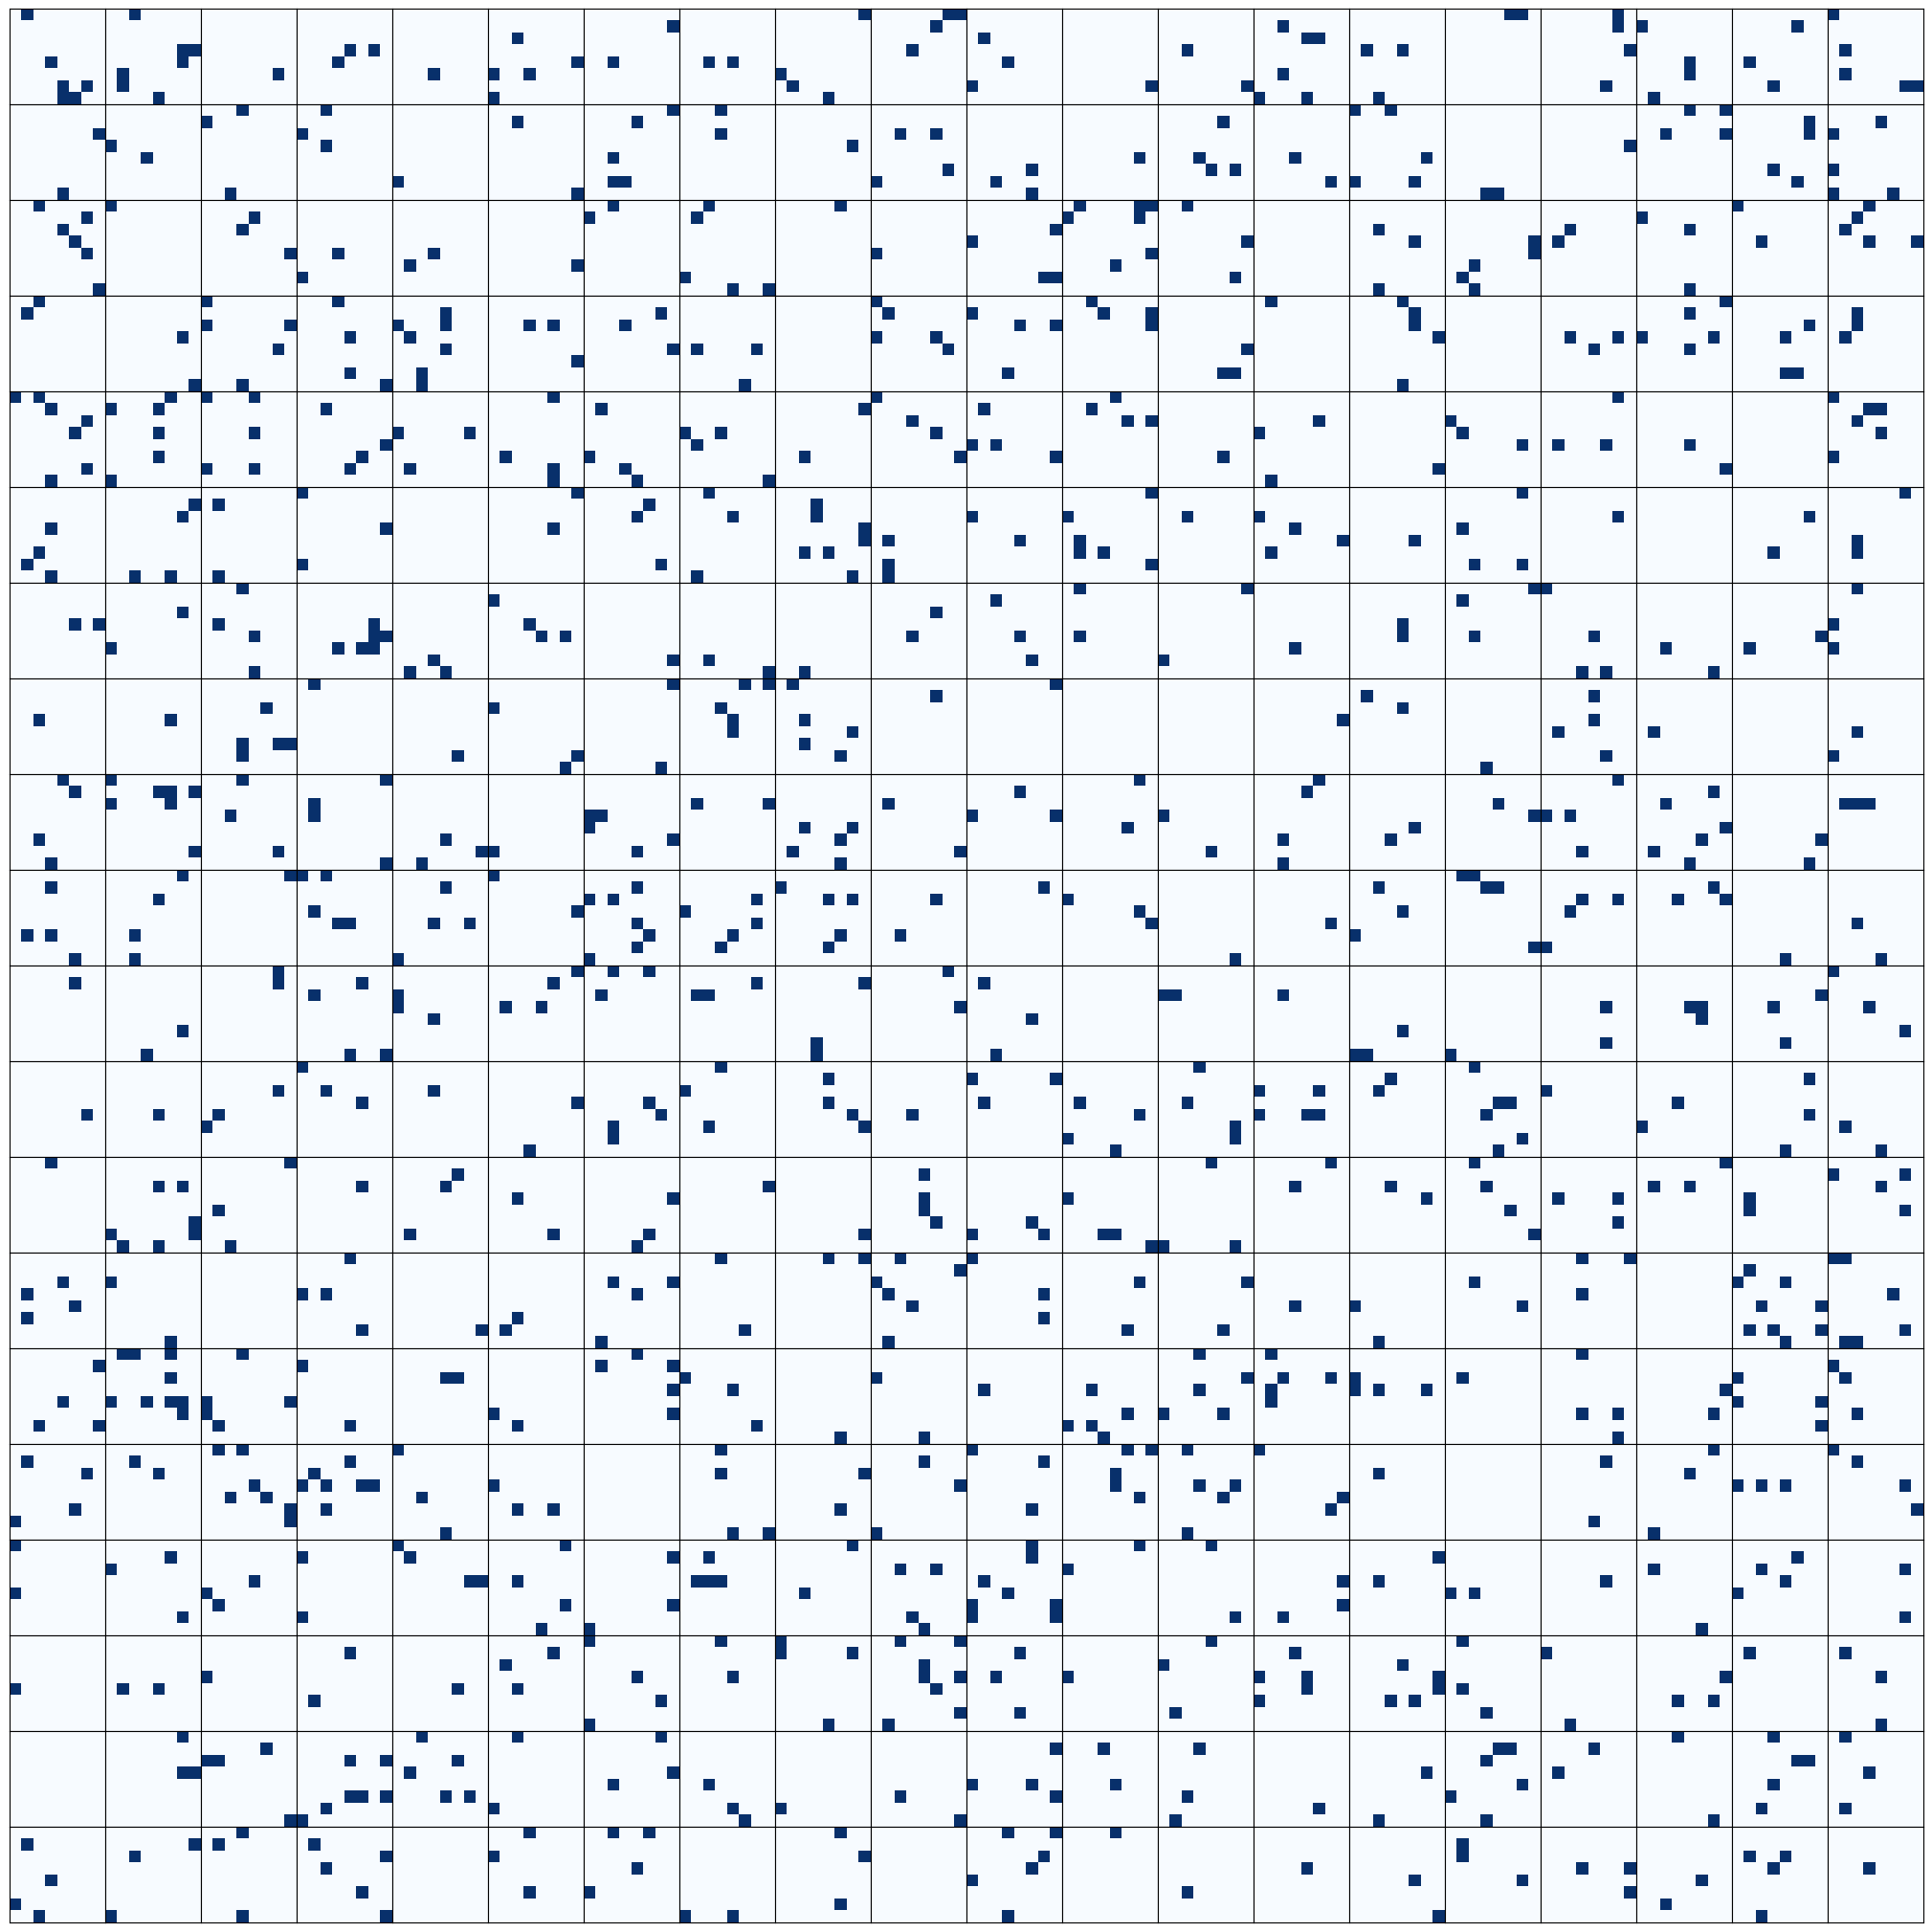

In [29]:
Th = 0.5 # Theshold in spe
t0 = 40 # Initial time of trigger in ns
Window = 5 # Coincidence window in ns
Noise_cam = sipm.Camera_noise(Pulse_shape, N_pixel, Pixel_size, M, DCR, Cross, After, W, R, sigma, Nr, Nc, t0, Window, Th)

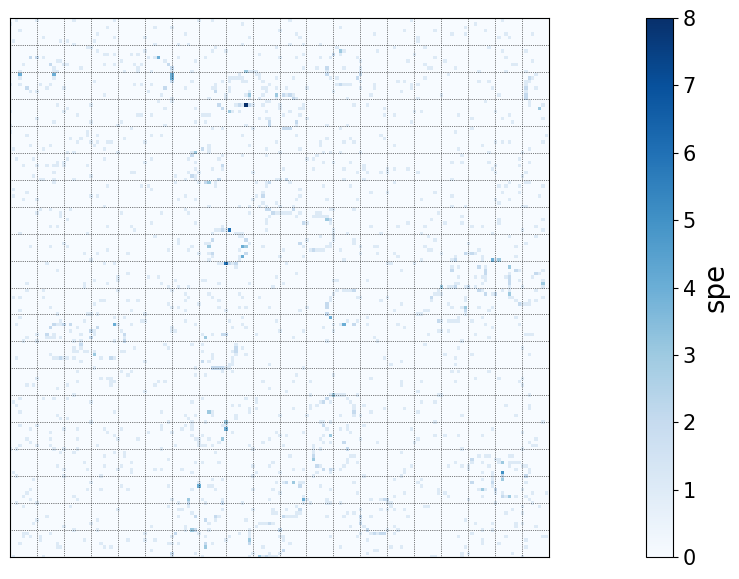

In [31]:
import matplotlib

Event = Ring_array.T+Noise_cam

plt.figure(figsize=(25, 7))
plt.imshow(Event, cmap='Blues')

for i in range(Nc):
    plt.axvline((i+1)*8, color='k', lw=0.5, ls='dotted')
for i in range(Nr):
    plt.axhline((i+1)*8, color='k', lw=0.5, ls='dotted')

plt.xticks([])
plt.yticks([])
plt.axis([0,Nc*8,0,Nr*8])

cbar = plt.colorbar(norm=matplotlib.colors.LogNorm())
cbar.ax.tick_params(labelsize=15)
cbar.set_label(label="spe", size=20)

plt.savefig('Figures/Rich.eps', format='eps', bbox_inches='tight', pad_inches=0)

## L0 trigger: MPPC sum

The first trigger level conssists of summing (analog or digital) all the 64 channles of a MPPC above a threshold (0.5 spe) and in a coincidence time window of few ns. In the sum overpasses the sum threshold (majority trigger) generates a L0 trigger signal.

In [32]:
L0_trigger = np.zeros((Nr, Nc))
L0_threshold = 5

for i in range(Nr):
    for j in range(Nc):
        if np.sum(Event[i*8:i*8+8,j*8:j*8+8]) > L0_threshold:
            L0_trigger[i,j] = 1

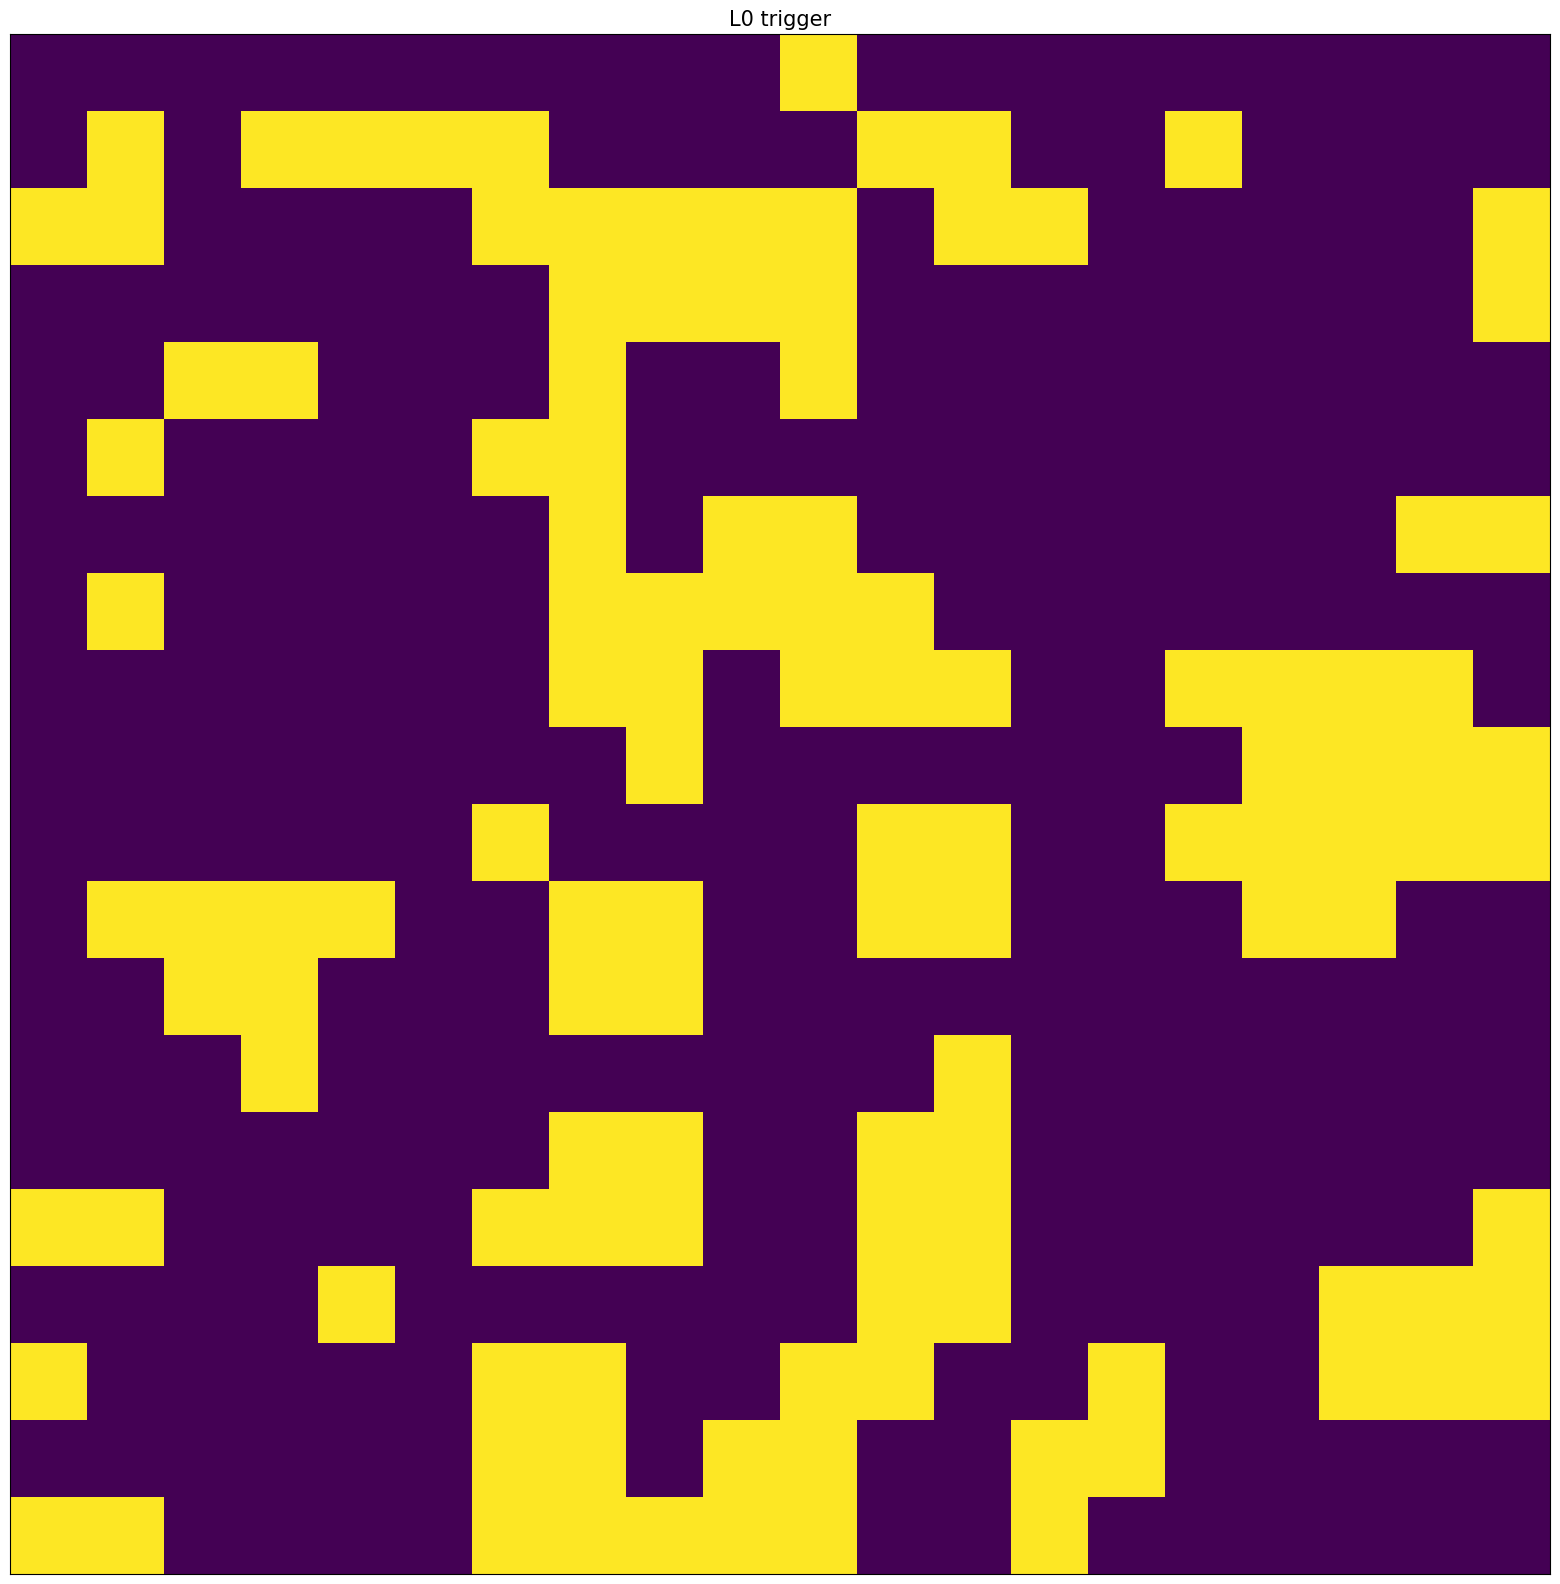

In [33]:
plt.figure(figsize=(Nc, Nr))
plt.imshow(L0_trigger, origin='lower')
plt.title("L0 trigger", fontsize=15)
plt.xticks([])
plt.yticks([])
plt.show()

## L1 trigger: Back panel

The second level of the triggering system consists of summing six neighboring MPPC wich composes a back panel. The L1 triggers when the sum overpasses a minimum number of triggered MPPCs.

In [36]:
Bc = 3 # Number of columns per panel
Br = 3 # Number of rows per panel

Pc = int(Nc/Bc)
Pr = int(Nr/Br)
      
L1_trigger = np.zeros((Pr, Pc))
L1_threshold = 1

for i in range(Pr):
    for j in range(Pc):
        if np.sum(L0_trigger[i*Bc:i*Bc+Bc,j*Br:j*Br+Br]) >= L1_threshold:
            L1_trigger[i,j] = 1

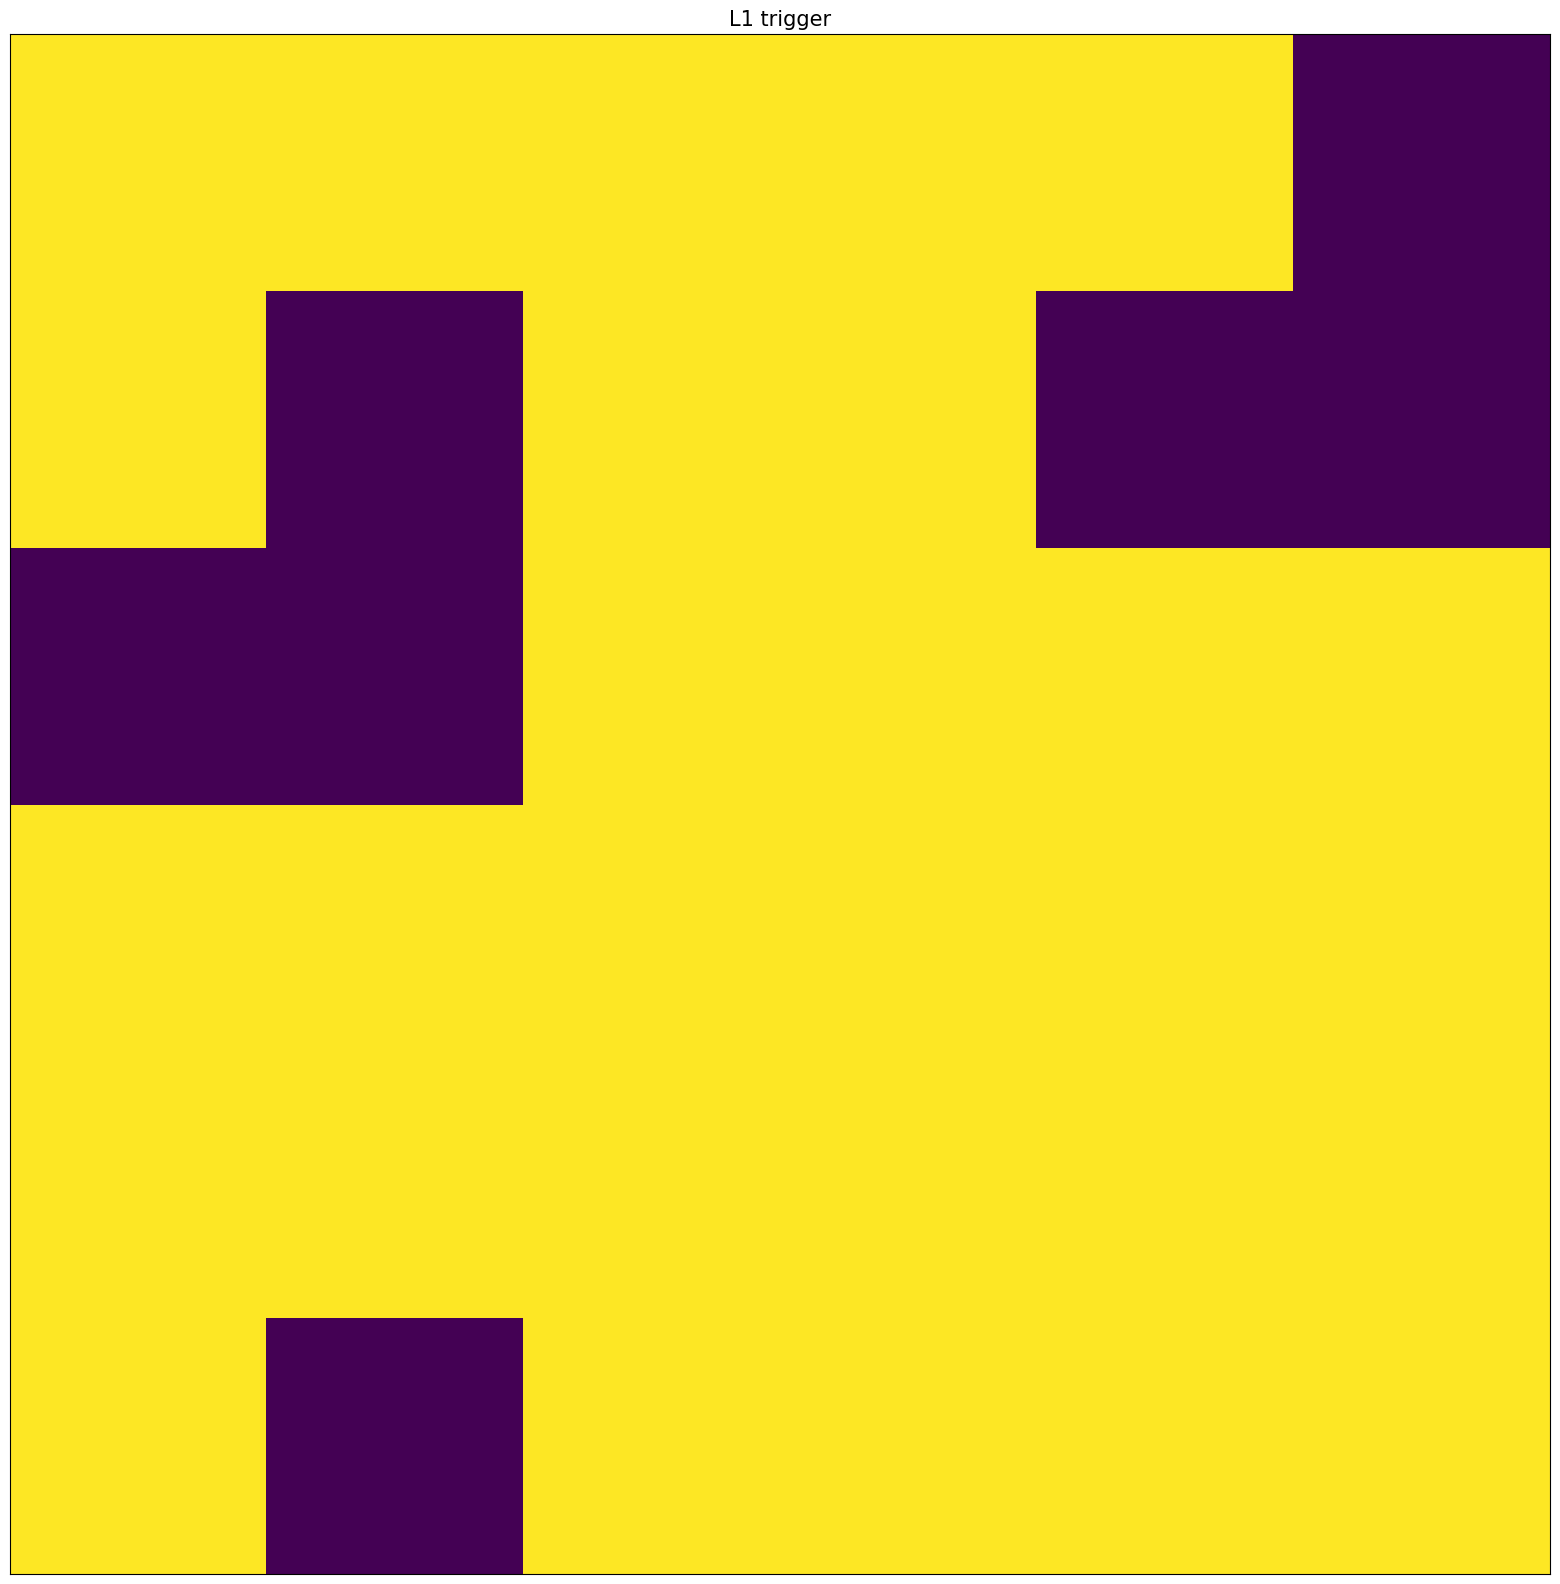

In [37]:
plt.figure(figsize=(Nc, Nr))
plt.imshow(L1_trigger, origin='lower')
plt.title("L1 trigger", fontsize=15)
plt.xticks([])
plt.yticks([])
plt.show()

## L2 trigger: Camera trigger

The third level of the triggering ssytem consits in summing all the back panles clusters of the camera. L2 triggers when the sum is above a minimum threshold.

In [38]:
L2_threshold =  5

if np.sum(L1_trigger) > L2_threshold:
    L2_trigger = np.ones((Pr, Pc))
    bool_event = "Event"
else:
    L2_trigger = np.zeros((Pr, Pc))
    bool_event = "No Event"
print (bool_event)

Event


<function matplotlib.pyplot.show(close=None, block=None)>

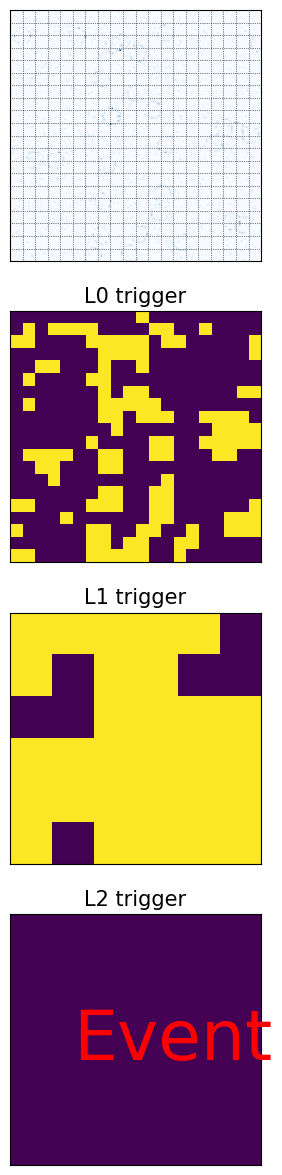

In [39]:
plt.figure(figsize=(35, 15))

plt.subplot(4,1,1)
plt.imshow(Event, cmap='Blues')

for i in range(Nc):
    plt.axvline((i+1)*8, color='k', lw=0.5, ls='dotted')
for i in range(Nr):
    plt.axhline((i+1)*8, color='k', lw=0.5, ls='dotted')

plt.xticks([])
plt.yticks([])
plt.axis([0,Nc*8,0,Nr*8])

# cbar = plt.colorbar(norm=matplotlib.colors.LogNorm())
# cbar.ax.tick_params(labelsize=15)
# cbar.set_label(label="spe", size=25)

plt.subplot(4,1,2)
plt.imshow(L0_trigger, origin='lower')
plt.title("L0 trigger", fontsize=15)
plt.xticks([])
plt.yticks([])

plt.subplot(4,1,3)
plt.imshow(L1_trigger, origin='lower')
plt.title("L1 trigger", fontsize=15)
plt.xticks([])
plt.yticks([])

plt.subplot(4,1,4)
plt.imshow(L2_trigger, origin='lower')
plt.text(1,2,bool_event, fontsize=50, color='r')
plt.title("L2 trigger", fontsize=15)
plt.xticks([])
plt.yticks([])

plt.show